# TP4 : Sismique réfraction

### Instructions pour le devoir

Ce laboratoire porte sur la méthode de la sismique réfraction. Il comporte une section théorique et une section expérimentale où vous aurez à traiter des données acquises sur le terrain.
  
- Vous devez utiliser Google Colab pour réaliser ce travail pratique.
- Remplissez vos réponses dans les cellules indiquées. Les réponses peuvent prendre la forme d'un segment de code ou d'une réponse textuelle, ou les deux.
- Bien commenter les cellules de code afin de décrire la démarche.
- Assurez-vous que chaque cellule s'exécute et donne la réponse désirée avant de remettre votre notebook. Pour ce faire, il est recommandé d'exécuter Kernel -> Restart and Run All.
- Vous devez remettre les fichiers du jupyter notebook complété (.ipynb), ainsi que sa version pdf (File->Download as -> pdf).

### Installation des librairies nécessaires

Votre environnement n'a pas encore les librairies nécessaires pour ce TP. Faites rouler la cellule suivante.

In [ ]:
!pip install obspy tetgen
!pip install ipympl

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()
import obspy
from FonctionsTP4 import seismic_wiggle, picker, butter_bandpass_filter, balans
import numpy as np
from IPython.display import Image

## Partie 1: Section théorique

### Q1 Temps de parcours (1 points)
Selon un milieu à deux couches montré à la figure suivante

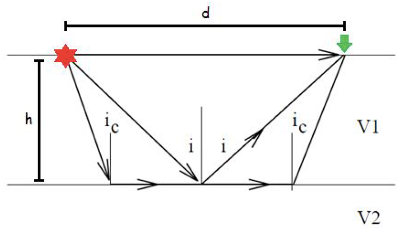

__A)__ Déterminez le temps de parcours $t_{air}$ pour l’onde qui voyage dans l’air en fonction de la distance d et la vitesse dans l’air ($v_{air}$ = 340.29 m/s).

<span style="color:red">
Réponse:
</span>

__B)__ Déterminez le temps de parcours de l’onde directe en fonction de la distance d et de la vitesse V1.

<span style="color:red">
Réponse:
</span>

__C)__ Déterminez l’angle critique $i_c$ en fonction des vitesses V1 et V2.

<span style="color:red">
Réponse:
</span>

__D)__ Déterminez le temps de parcours de la réflexion P-P en fonction de la vitesse V1, de l’épaisseur h et de la distance d.

<span style="color:red">
Réponse:
</span>

__E)__ Déterminez le temps de parcours de l’onde réfractée P en fonction de V1, de l’épaisseur h et de la distance d.

<span style="color:red">
Réponse:
</span>

__F)__ Déterminez la distance critique de l’onde P, c’est-à-dire la distance la plus courte à laquelle l’onde réfractée peut atteindre la surface, en fonction de V1, V2, de l’épaisseur h et de la distance d.

<span style="color:red">
Réponse:
</span>

__G)__	Déterminez le temps d’intercepte de l’onde P réfractée en fonction de V1, V2, de l’épaisseur h et de la distance d.

<span style="color:red">
Réponse:
</span>

__H)__	Déterminez la distance de croisement, c’est-à-dire la distance où le temps de parcours de l’onde directe est égal au temps de parcours de l’onde réfractée, en fonction de V1, V2, de l’épaisseur h et de la distance d.

<span style="color:red">
Réponse:
</span>

### Q2 Milieu à N couches (1 points)

Pour un milieu tabulaire à N couches avec V_1<VN, déterminez le temps de parcours de la réfraction critique à l’interface de la couche N en fonction des vitesses de chaque couche Vi et de leur épaisseur hi.  

<span style="color:red">
Réponse:
</span>

### Q3 Milieu à N couches (2 points)
Le tableau suivant donne les temps des premières arrivées mesurées lors d’un levé de sismique réfraction réalisé pour déterminer l’épaisseur et l’attitude du mort-terrain.  Les tirs A et B sont les tirs direct et inverse réalisés à 15 m des extrémités du dispositif de géophones. La surface du sol est plane.  

\begin{array}{|c|c|c|}
\hline \textrm{Position du géophone (m)} & \textrm{Temps (ms) tir direct} &  \textrm{Temps (ms) tir inverse} \\\hline
0 \textrm{ (tir A)}&	0	& -  \\\hline
15	& 10	& 85  \\\hline
30	& 20	& 80  \\\hline
45	& 30	& 74  \\\hline
60	& 40	& 69  \\\hline
75	& 50	& 63  \\\hline
90	& 60	& 57  \\\hline
105	& 65	& 51  \\\hline
120	& 69	& 46  \\\hline
135	& 73	& 40  \\\hline
150	& 77	& 30  \\\hline
165	& 81	& 20  \\\hline
180	& 85	& 10  \\\hline
195 \textrm{ (tir B)}& - & 0  \\\hline
\end{array}

__A)__	Tracez les dromochroniques.

__B)__	Trouvez les vitesses de la première et de la deuxième couche, le pendage de la première, et les profondeurs au réfracteur à la verticale des points de tir A et B.

<span style="color:red">
Réponse:
</span>

## Partie 2: Section expérimentale


## Introduction (Mise en contexte)

Votre firme XYZ inc. a été chargée de caractériser le site d'un puits pour le prélèvement d'eau potable dans le roc fracturé situé en Montérégie. L'épaisseur de dépôts meubles, le type de dépôts meubles ainsi que l'épaisseur de roc fracturé avant d'atteindre le roc sain sont des informations nécessaires, car ces paramètres influencent notamment la recharge ainsi que la vulnérabilité de l'aquifère à la contamination. Cette caractérisation servira également ultimement à construire un modèle numérique pour évaluer les temps de migration de l'eau souterraine et établir des aires de protection autour du puits. Vous avez décidé de procéder à un levé de sismique réfraction pour déterminer la profondeur du socle rocheux.


La géologie du socle rocheux est plutôt homogène et correspond à la formation de Bourret, qui correspond à une ardoise avec interlits de grès et de calcaire.

La géologie des dépôts meubles du site est présentée à la figure suivante.

In [ ]:
Image(filename='depots_meubles.PNG')

Vous avez également accès aux notes de forage du puits pour vous aider lors de l'interprétation. Notez que les profondeurs sont en pieds.

In [ ]:
Image(filename='notes_forages.PNG')

### Étape 1: Formulation du problème (0,25 points)

Quels sont les objectifs du levé géophysique ?

<span style="color:red">
Réponse:
</span>

### Étape 2: Choix des propriétés géophysiques (0,25 points)

Justifiez le choix d'une méthode sensible aux changements de vitesse sismique afin d'atteindre les objectifs du levé.

<span style="color:red">
Réponse:
</span>

### Étape 3: Choix de la méthode géophysique (0,25 points)

Justifiez votre choix d'un levé en sismique réfraction. Selon ce que vous connaissez de la géologie, y-a-t-il des limitations connues de la méthode qui pourraient affecter vos résultats ?

<span style="color:red">
Réponse:

</span>

### Étape 4: Acquisition des données (1 points)

Vous devez simuler l'acquisition de vos propres données sur le terrain. Remplissez la feuille de terrain fournie en annexe.

### Étape 5 Traitement des données (2,75 points)

Dans cette section, vous aurez à traiter et interpréter les données de sismique réfraction acquises lors de la campagne de caractérisation du site

Chacun des tirs se trouve dans un fichier <code>.dat</code> au format <code>sg2</code>. Dans ce levé, les 48 géophones étaient positionnés à 5 m d'intervalle. La position des tirs est affichée dans le tableau suivant.

<br>

| Tirs | <span style="font-weight:normal">1</span> | <span style="font-weight:normal">29</span> | <span style="font-weight:normal">54</span> | <span style="font-weight:normal">76</span> | <span style="font-weight:normal">106</span> |
| :--: | :--: | :--: | :--: | :--: | :--: |
| __Positions (m)__ | -10 | 57.5 | 117.5 | 172.5 | 245 |

<br>

<!-- | | | | | | |
| :--: | :--: | :--: | :--: | :--: | :--: |
| __Tirs__ | 1 | 29 | 54 | 76 | 106 |
| __Positions (m)__ | -10 | 57.5 | 117.5 | 172.5 | 245 | -->

Les positions des tirs et des receveurs définies par les deux variables suivantes.

In [ ]:
ShotPos = np.array([-10, 57.5, 117.5, 172.5, 245])
RecPos = np.arange(0, 240, 5)
print(RecPos)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235]


__A)__ Faites le pointé des premières arrivées pour tous les tirs. Pour vous aider, nous vous fournissons le script de la cellule suivante.

1. À la première ligne, nous utilisons la fonction `obspy.read` pour lire le fichier `.sg2`. Ceci ressort un objet obspy appelé `Trace`, qui contient plusieurs informations pour chaque trace, dont les données.
2. Le temps d'échantillonnage est ensuite extrait du fichier.
3. Nous extrayons les données pour en faire un `np.array`.
4. Nous créons une figure montrant les données avec la fonction `seismic_wiggle`. La fonction butter_bandpass_filter permet de filtrer le bruit sur les données et mieux visualiser les premières arrivées. Vous devriez jouer avec les paramètres de ces fonctions pour mieux identifier les premières arrivées, notamment <code>fmin</code>, <code>fmax</code>, <code>scale</code> et <code>clip</code>. Voir le fichier `FonctionTP4.py` pour la documentation.
5. La fonction `picker` sert à ajouter la capacité à la figure d'identifier les premières arrivées. Un clic gauche sur une trace permet d'identifier l'arrivée, un clic droit sur un temps identifié le supprime, appuyez sur la touche `f` et les premières arrivées seront sauvegardées dans le fichier indiqué par l'argument `filename`.



In [ ]:
rec1 = obspy.read('1.dat')
dt = rec1[0].stats.delta
data1 = np.stack([t.data for t in rec1], axis=1)

fig, ax = plt.subplots(1,1, figsize=(15, 8))

seismic_wiggle(balans(butter_bandpass_filter(data1, 40, 150, 1/dt)), dt=dt, offsets=RecPos, normalize="trace", scale=3, clip=4, ax=ax)
ax.set_ylim(0.2, 0)
picks1 = picker(ax, RecPos, filename="rec1.npy")
plt.show()

Les pointés peuvent ensuite être obtenus grâce à la variable `picks1026`.

In [ ]:
print(picks1.xs) #position des traces
print(picks1.ys) #temps d'arrivée

Refaites ce processus pour chaque tir.

In [ ]:
# Réponse Tir 29

In [ ]:
# Réponse Tir 54

In [ ]:
# Réponse Tir 76

In [ ]:
# Réponse Tir 106

Vous remarquerez que certains tirs sont plus bruités que d'autres. Commentez sur les raisons qui peuvent causer du bruit sur les données sismiques et sur les stratégies pour le minimiser.

Réponse:

__B)__  Produire une figure montrant les dromochroniques de tous les points de tir, soit un graphique avec la position de la trace en x et le temps d'arrivées en y. Dans la légende, identifiez chacun des tirs.

In [ ]:
# Répondre ici


fig1, ax1 = plt.subplots(1,1, figsize = (8,5))

line1, = ax1.plot(picks1.xs, picks1.ys*1000, "-*")
line2, = ax1.plot(picks29.xs, picks29.ys*1000, "-*")
line3, = ax1.plot(picks54.xs, picks54.ys*1000, "-*")
line4, = ax1.plot(picks76.xs, picks76.ys*1000, "-*")
line5, = ax1.plot(picks106.xs, picks106.ys*1000, "-*")
ax1.legend((line1, line2, line3, line4, line5),
             ('1', '29', '54', '76', '106'))
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Temps (ms)')
ax1.set_title('Dromochroniques de tous les tirs')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

__C)__ Produire une figure montrant les temps d’arrivée des 5 points de tir en fonction de la distance de la source (distance du géophone – distance du tir).

In [ ]:
# Répondre ici

__D)__ Justifiez le traitement en couches planes horizontales à partir de cette figure.

<span style="color:red">
Réponse :
</span>


__E)__ On vous demande de faire le traitement du levé selon un modèle de n couches horizontales. Pour cela,
 regroupez tous les temps d’arrivée de tous les tirs dans un même vecteur, et faites votre traitement comme s’il n’y avait qu’un seul tir.

__E i)__ Créez deux vecteurs: un vecteur contenant les valeurs absolues de la distance à la source de tous les pointés que vous nommerez `xall`et un vecteur contenant tous les pointés (unité secondes), que vous nommerez `tall`. Vous pouvez utiliser la fonction `np.hstack`.

In [ ]:
# Répondre ici

xall = np.abs(np.hstack([picks1.xs-ShotPos[0],
                         picks29.xs-ShotPos[1],
                         picks54.xs-ShotPos[2],
                         picks76.xs-ShotPos[3],
                         picks106.xs-ShotPos[4]]
                   ))

tall = np.hstack([picks1.ys,
                  picks29.ys,
                  picks54.ys,
                  picks76.ys,
                  picks106.ys]
                   )

La fonction suivante permet de séparer en plusieurs segments les pointés selon leur distance de croisement, et retourne la vitesse apparente de chaque segment, ainsi que le temps d'intercepte en faisant une régression linéaire. Cette fonction affiche aussi le graphique des temps d'arrivées et des régressions linéaires de chaque segment.

In [ ]:
def vitesses(x, t, xi):
    """
    Sépare les pointés en segment, et retourne la vitesse et le temps d'intercepte.
    Affiche une figure des temps d'arrivées et des segments identifiés

    :param x:    vecteur de position des pointé (m)
    :param t:    vecteur des temps des pointés (s)
    :param xi:   liste contenant les distances de croisement désirées

    :return v:   liste contenant la vitesse de chaque segement (inverse de la pente)
    :return to:  temps d'intercepte de chaque segment.
    """
    xi = [0] + xi + [x.max()]
    v = []
    t0 = []
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    for ii in range(len(xi)-1):
        thisx = x[(xi[ii] < x) & (x <= xi[ii+1])]
        thist = t[(xi[ii] < x) & (x <= xi[ii+1])]
        fit = np.polyfit(thisx, thist, 1)
        v.append(1.0/fit[0])
        t0.append(fit[1])
        line, = ax.plot(thisx, thist, ".")
        ax.plot([xi[ii], xi[ii+1]], [fit[0]*xi[ii] + fit[1], fit[0]*xi[ii+1] + fit[1]], line.get_color())
    plt.show()
    return v, t0

__E ii)__ Écrire une fonction permettant de calculer l'épaisseur de chaque couche selon la méthode de distance de croisement. Votre fonction doit prendre en entrée une liste des vitesses de chaque couche ainsi que le temps d'intercepte. Les distances de croisement devraient être calculées grâce aux vitesses et au temps d'intercepte. Votre fonction devrait retourner les distances de croisement et les épaisseurs de chaque couche.  

In [ ]:
# Répondre ici
def ncouche_xi(v, t0):
    h = []
    xi = []
    for ii in range(len(v)-1):
        xi.append( (t0[ii+1]-t0[ii]) / (1.0/v[ii]-1.0/v[ii+1]) )
        hii = xi[-1]/2*np.sqrt((v[ii+1]-v[ii])/(v[ii+1]+v[ii]))
        for jj in range(ii):
            K = (np.sqrt(1 - v[jj]**2/v[ii+1]**2) - np.sqrt(1 - v[jj]**2/v[ii]**2)) / np.sqrt(v[jj]**2/v[ii]**2 - v[jj]**2/v[ii+1]**2)
            hii -= h[jj] * K
        h.append(hii)
    return xi, h

__E iii)__ Écrire une autre fonction qui estime l'épaisseur de chaque couche, cette fois, avec la méthode des temps d'intercepte.

In [ ]:
# Répondre ici
def ncouche_t0(v, t0):
    h = []

# À compléter

    return h

__E iv)__ Avec les fonctions que vous venez de définir, estimez les vitesses et épaisseurs pour un modèle à 2 couches selon la méthode des distances de croisement et des temps d'intercepte. Votre cellule devrait imprimer les valeurs (vitesses, épaisseurs) obtenues selon les deux méthodes.

In [ ]:
# Répondre ici

__E v)__ Refaites l'analyse pour un modèle à 3 couches.

In [ ]:
# Répondre ici

### Étape 6 Interprétation des résultats (0.5 points)


Précisez quel est le meilleur modèle pour le traitement des données sismiques selon vous (2,3 couches) ? Est-ce que le nombre de couches influence les vitesses et profondeurs obtenues. Selon votre meilleur modèle, interprétez les différentes couches obtenues en justifiant votre analyse.

Comparez le résultat de votre modèle à 2 ou 3 couches à la coupe de vitesse sismique suivante, obtenue par tomographie de sismique réfraction.


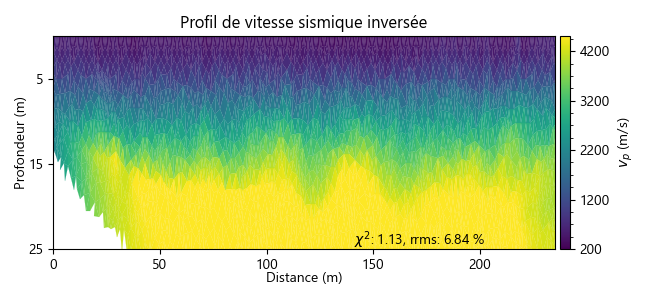

In [ ]:
Image(filename='profil_tomo_sismique.png')

<span style="color:red">
Réponse :
</span>

### Étape 7 Synthèse (1 points)
On vous demande de proposer une interprétation géologique des résultats pour répondre aux objectifs du levé sous forme d'une coupe géologique.

Utilisez toutes les informations à votre disposition. Vous avez également un profil de résistivité électrique inversée localisé au même emplacement que la ligne sismique pour appuyer votre interprétation.

Faites un retour sur les objectifs du levé. Ont-ils été atteints ?
Votre analyse comporte-t-elle des limitations et incertitudes.
Discutez des limitations de la méthode de sismique réfraction et du choix des paramètres d'acquisition en fonction du contexte du site. Avez-vous des propositions pour des travaux futurs qui permettraient de valider vos résultats ?

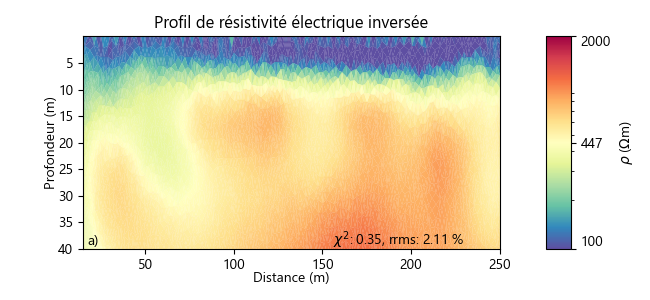

In [ ]:
Image(filename='profil_inv_elec.png')

<span style="color:red">
Réponse :
</span>